In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from scipy.interpolate import spline
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')


In [129]:
df_11= pd.read_csv('TOTAL')
df_11.columns

Index(['Unnamed: 0', 'athlete_categories', 'athlete_country_id',
       'athlete_gender', 'athlete_id', 'athlete_last', 'athlete_yob', 'coach',
       'current_rankings', 'higher_education', 'hobbies', 'injuries',
       'languages_spoken', 'marital_status', 'occupation', 'place_of_birth',
       'sponsors', 'spouse_children', 'validated', 'weight',
       'finish_percentage', 'race_finishes', 'race_podium_percentage',
       'race_podiums', 'race_starts', 'race_wins', 'event_categories',
       'event_country', 'event_country_id', 'event_date', 'event_id',
       'event_latitude', 'event_longitude', 'event_region_id',
       'event_specifications', 'event_venue', 'headers_count', 'position',
       'prog_id', 'result_id', 'result_listing', 'team', 'team_id',
       'team_order', 'total_time', 'swim', 't1', 'bike', 't2', 'run'],
      dtype='object')

In [120]:
df=df.drop('Unnamed: 0', axis=1)

In [130]:
remove= [ 'athlete_last','result_listing', 'team', 'team_id','team_order','Unnamed: 0']

In [131]:
df_11= df_11.drop(remove, axis=1)

In [139]:
df_11= df_11.set_index('total_time').reset_index()

In [147]:
frame= [df_11,df]

In [148]:
total = pd.concat(frame)

In [150]:
total= total.reset_index()
total.to_csv('TOTAL')

In [36]:
# df_10= df_10.fillna(0)
index_drop = [ i for i in df_10[df_10['swim']==0].index]
df_10= df_10.drop(index_drop)

In [45]:
time_0= [i for i in df_10[df_10['total_time']==0].index]
df_10=df_10.drop(time_0)

In [3]:
test= pd.read_csv('OFFICAL_TOTAL')

In [5]:
test= test.drop('Unnamed: 0', axis=1)

In [174]:
index = [i for i in test[test['t2']=='00:00:00'].index]
index

[]

In [171]:
test = test.drop(index)


In [176]:
test.to_csv('cleaned_total')

In [177]:
for n in ['swim','t1','bike','t2','run','total_time']:
    test[n] = pd.to_timedelta(test[n])

In [224]:
total['bike_m'] = total['bike'] / pd.Timedelta(minutes=1)
total['run_m'] = total['run'] / pd.Timedelta(minutes=1)
total['t1_s'] = total['t1'] / pd.Timedelta(minutes=1)
total['t2_s'] = total['t2'] / pd.Timedelta(minutes=1)
total['total_tran']=total['t2_s']+total['t1_s']
total['total']=total['total_time'] / pd.Timedelta(minutes=1)



In [229]:
sprint= total[total['total']<120]

In [230]:
sprint.to_csv('sprint')

In [257]:
x = total['total_time'][:400]

In [306]:

# total['total_time']=total['total_time'].replace('DSQ','00:00:00')
# total['total_time']=total['total_time'].replace('LAP','00:00:00')
# total['total_time']= total['total_time'].replace('DNS','00:00:00')
# total['total_time']= total['total_time'].replace('140pts','00:00:00')
total['total_time']= total['total_time'].replace('140 pts','00:00:00')

In [84]:


test['total_time']=test['total_time'].replace('DSQ','00:00:00')
test['total_time']=test['total_time'].replace('LAP','00:00:00')
test['total_time']= test['total_time'].replace('DNS','00:00:00')
test['total_time']= test['total_time'].replace('140 pts','00:00:00')
test['total_time']= test['total_time'].replace('4775 pts','00:00:00')
test['total_time']= test['total_time'].replace('38 pts','00:00:00')
test['run']= test['run'].replace('00:46.33','00:00:00')
    

In [99]:
test[test['run']=='00:48.01']

,total_time,athlete_categories,athlete_country_id,athlete_gender,athlete_id,athlete_yob,coach,current_rankings,higher_education,hobbies,...,event_venue,headers_count,position,prog_id,result_id,swim,t1,bike,t2,run
16690,02:28:10,[42],170.0,female,21277.0,1957.0,0,0,0,0,...,Charleville,5.0,15,261603.0,391150.0,00:10:27,00:01:41,01:19.17,00:00:00,00:48.01


In [168]:
for i in test['t2']:
    print (i)
    pd.to_timedelta(i)

00:00:57
00:00:00
00:06:58
00:00:50
00:00:00
00:14:58
00:01:02
00:00:48
00:00:00
00:01:17
00:01:04
00:01:02
00:00:48
00:00:48
00:00:54
00:00:54
00:00:53
00:01:48
00:00:51
00:14:28
00:01:03
00:01:09
00:17:24
00:01:04
00:00:51
00:02:34
00:16:15
00:15:58
00:01:12
00:16:33
00:01:04
00:01:04
00:02:12
00:00:59
00:00:47
00:01:08
00:00:58
00:00:56
00:00:00
00:17:34
00:01:03
00:19:28
00:00:48
00:01:29
00:02:42
00:00:57
00:02:41
00:01:15
00:01:00
00:01:10
00:01:25
00:01:08
00:00:00
00:01:41
00:04:50
00:00:00
00:01:08
00:02:06
00:00:53
00:02:56
00:00:00
00:01:52
00:01:07
00:00:00
00:00:58
00:01:01
00:03:11
00:01:02
00:00:57
00:03:40
00:00:00
00:00:50
00:01:00
00:02:07
00:02:02
00:01:00
00:00:52
00:00:54
00:00:40
00:01:16
00:01:12
00:01:22
00:00:54
00:00:23
00:00:39
00:00:41
00:01:03
00:01:08
00:00:52
00:01:21
00:00:00
00:03:58
00:01:00
00:00:54
00:02:13
00:16:09
00:00:54
00:02:35
00:00:56
00:00:54
00:02:08
00:01:04
00:00:32
00:00:54
00:00:58
00:14:44
00:01:00
00:01:21
00:16:01
00:16:36
00:00:00
0

00:03:39
00:05:09
00:03:09
00:01:04
00:01:12
00:01:27   
00:02:24
00:03:14
00:03:58
00:02:42
00:03:07
00:02:45
00:03:27
00:03:54
00:02:00
00:02:58
00:03:13
00:03:26
00:03:10
00:03:23
00:00:00
00:05:11
00:00:51
00:02:07
00:00:24
00:06:05
00:00:43
00:00:43
00:00:36
00:00:51
00:00:00
00:00:41
00:00:48
00:00:00
00:00:31
00:00:29
00:00:39
00:03:13
00:02:52
00:03:36
00:03:20
00:03:16
00:03:05
00:03:33
00:03:41
00:00:00
00:03:33
00:03:37
00:03:12
00:00:00
00:02:35
00:03:10
00:02:18
00:04:11
0
00:02:36
00:00:00
00:02:34
00:00:00
00:00:00
00:03:47
00:00:00
00:01:47
00:03:28
00:02:47
00:02:34
00:02:55
00:02:47
00:02:15
00:02:10
00:00:29
00:00:43
00:00:31
00:00:19
00:00:00
00:00:00
00:00:39
00:00:38
00:00:32
00:02:36
00:00:53
00:00:00
00:02:19
00:03:43
00:03:18
00:02:50
00:00:00
00:01:39   
00:01:07   
00:03:32
00:02:11
00:02:42
00:02:55
00:02:53
00:03:03
00:02:39
00:00:41
00:01:27
00:03:33
00:00:31
00:02:21
00:04:10
00:00:52
00:02:31
00:02:42
00:02:43
00:02:46
00:03:24
00:02:40
00:02:47
00:02:28

00:00:00
00:00:00
00:03:38
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:02:13
00:00:00
00:00:00
00:00:00
00:00:35
00:09:12
00:00:00
00:00:00
00:07:31
00:07:33
00:04:59
00:05:35
00:06:03
 00:03:11
00:00:39
 00:00:51
00:01:51
00:04:50
00:00:53
00:02:29
00:00:55
00:01:00   
00:00:20
 00:00:12
00:00:33
00:01:16
00:01:10   
00:02:49
00:00:30
00:02:23
 00:00:59
00:03:22
00:03:13
00:03:54
00:00:00
 00:00:40
00:00:31
00:04:07
 00:00:00
00:00:41
00:01:02   
00:00:22   
00:02:29
00:00:00
00:00:58
00:01:41
00:00:55
00:00:41
 00:01:30
 00:03:05
00:01:55
00:00:44
00:02:00
00:06:02
00:06:25
00:03:51
00:03:56
00:04:45
00:05:27
00:06:34
00:05:21
00:03:40
00:06:22
00:05:11
00:05:22
00:05:33
00:05:22
00:04:19
00:06:17
00:06:54
00:04:49
00:06:52
00:05:30
00:06:05
00:03:12
00:04:29
00:06:42
00:04:17
00:01:54
00:06:22
00:07:38
00:09:24
00:07:55
00:00:59
00:01:23
00:00:46
00:01:05
00:01:03
00:00:42
00:00:40
00:01:41
00:00:00
00:01:18

00:05:33
00:03:25
00:04:10
00:02:55
00:04:49
00:03:31
00:03:19
00:02:57
00:03:56
00:04:39
00:03:35
00:02:19
00:03:51
00:03:45
00:03:33
00:03:16
00:07:23
00:02:24
00:02:59
00:02:50
00:04:10
00:03:45
00:03:20
00:01:55
00:03:06
00:06:21
00:04:08
00:05:08
00:04:40
00:03:50
00:02:19
-
00:03:46
00:02:51
00:03:02
00:03:31
00:04:45
00:04:29
00:04:49
-
00:02:44
00:03:38
00:01:55
00:02:41   
00:00:48
00:00:36
00:02:31
00:02:17
00:00:26
00:01:54
00:00:00
00:01:53
00:02:10
00:05:30
00:02:26
00:03:54
00:04:04
00:02:26
00:03:35
00:03:26
00:03:06
00:02:08
00:02:23
00:03:45
00:02:06
00:04:21
00:03:10
00:03:35
00:00:29
00:00:23
00:00:21
00:00:31
00:00:34   
00:00:44
00:01:59
 00:01:33
00:01:56
00:02:26
00:01:05
00:00:54
00:00:47
00:01:02
00:02:24
00:01:45
00:02:08
00:01:21
00:02:29
00:01:50
00:01:01
00:00:00
00:01:32
00:01:47
00:02:05
00:03:13
00:02:11
00:01:25
00:00:48
00:02:06
00:02:00
00:01:16
00:02:36
00:02:04
00:01:41
00:01:14
00:02:02
00:01:49
00:01:13
00:01:39
00:02:09
00:00:44
00:01:26
00:00:54

00:00:29   
00:00:27   
00:01:33   
00:01:24   
00:01:26   
00:01:08   
00:00:50   
00:00:51   
00:01:50   
00:00:26   
00:02:21   
00:03:24   
00:04:17   
00:02:30   
00:01:28   
00:01:09   
00:00:48   
00:00:39   
00:00:27   
00:00:31   
00:00:27   
00:02:53
00:00:38
00:02:24
00:00:47
00:00:38
00:00:35
00:00:44
00:00:33
00:01:38
00:00:32
00:00:26
00:00:33
00:00:46   
00:00:30
00:00:27
00:02:07
00:00:35
00:00:25
00:01:28
00:00:53
00:00:42
00:01:04
00:00:33
00:00:40
00:00:00
00:00:35
00:00:31
00:00:27
00:00:27
 00:00:54
 00:00:42
 00:00:13
 00:00:41
 00:00:38
 00:00:39
 00:00:44
 00:00:15
 00:00:29
 00:00:26
 00:00:39
 00:00:31
 00:00:50
 00:00:27
 00:01:39
00:05:24
0:09:15
00:00:22
00:00:37
00:00:41
00:00:17
00:01:43
00:01:49
00:02:17
00:00:40
00:01:28
00:01:27
00:01:20
00:00:41
00:00:40
00:01:58
00:01:45
00:01:23
00:02:23
00:02:29
00:00:40
00:01:02
00:01:09
00:01:04
00:00:51
00:00:53
00:01:33
00:01:09
00:02:50
00:02:28
00:01:51
00:01:43
00:00:36
00:00:47
00:00:27
00:00:57   
00:01:52

00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:01:25
00:01:32
00:01:15
00:00:00
00:01:08
00:01:05
00:00:00
00:02:37
00:04:19
00:02:46
00:02:44
00:00:54
00:00:48
00:00:54
00:00:56
00:01:06
00:00:54
00:00:51
00:00:38
00:00:48
00:01:00
00:00:43
00:00:48
00:03:12
00:00:47
00:00:45
00:00:41
00:00:43
00:00:43
00:00:41
00:00:45
00:00:38
00:00:41
00:00:30
00:00:41
00:01:09
00:00:00
00:00:19
00:00:51
00:00:56
00:00:25
00:00:20
0:00:50
00:03:26
00:01:09
00:04:19
00:00:53
00:03:41
00:03:16
00:02:55
00:03:37
00:00:48
00:02:39
00:03:03
00:00:31   
00:03:08
00:02:45
00:03:26
00:03:00
00:03:03
00:02:44
00:01:33
00:00:52
00:01:21
00:00:25
00:04:46
00:01:31
00:03:42
00:01:07
00:01:54
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:01:36
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:01:49
00:02:02
00:02:14
00:00:00
00:00:00
00:02:09
00:00:24
00:00:28   
00:01:14
00:01:10
00:04:43   
00:05:32
00

 00:01:41
00:01:38
00:00:43
00:01:06
00:00:00
00:00:00
00:01:19
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:01:20
00:01:10
00:02:41
00:00:52
00:02:03
00:00:59
00:01:55
00:01:07
00:01:52
00:00:37
00:01:19
00:01:48
00:00:54
00:01:46
00:01:02
00:00:52
00:01:06
00:01:15
00:00:44
00:01:01
00:00:54
00:00:52
00:00:43
00:00:35
00:00:32
00:00:00
00:00:00
00:00:51
00:00:49
00:00:20
00:00:00
 00:02:49
00:01:08
00:00:26
00:02:02
00:00:00
 00:01:18
00:02:27
00:05:23
00:04:50
00:03:36
00:04:44
00:01:40
-
0
00:06:57
00:05:38
00:04:17
00:02:15
00:05:30
00:08:15
00:05:47
00:05:01
00:11:13
00:06:23
00:05:45
00:02:40
00:09:46
00:04:06
00:04:32
00:01:12
00:05:14
00:06:40
00:06:30
00:04:40
00:01:40
00:06:04
00:04:00
00:05:05
00:03:32
00:04:45
00:03:06
00:05:00
00:05:30
00:05:40
00:02:00
00:05:02
00:01:36
00:02:09
00:12:16
00:08:11
00:09:15
00:09:27
00:03:14
00:07:34
00:02:52
00:06:29
00:04:09
00:05:05
00:07:58
00:10:44
00:04:29
00:04:44
00:05:41
00:02:45
00:00:00
00:

00:02:47
00:01:56
00:04:10
00:01:46
00:04:29
00:01:11
00:00:53
00:02:39
00:03:48
00:01:33
00:09:43
00:05:23
00:02:35
00:01:36
00:04:13
00:07:37
00:03:37
00:02:30
00:03:03
00:04:18
00:02:22
00:02:26
00:03:44
00:06:18
00:01:37
00:01:54
00:03:06
00:04:37
00:03:06
00:05:08
00:01:01
00:04:00
00:06:05
00:01:42
00:01:32
00:04:03
00:04:49
00:03:39
00:04:05
00:03:11
00:03:56
00:05:48
00:01:30
00:03:15
00:02:54
00:01:04
00:00:45
00:02:28
00:04:04
 00:05:59
00:02:57
00:02:20
00:06:05
00:02:57
00:03:07
00:02:18
00:01:52
00:03:24
00:03:53
00:07:15
00:03:18
00:03:54
00:01:46
00:04:50
00:02:05
00:01:59
00:03:06
00:05:55
00:05:39
00:03:37
00:03:24
00:01:26
00:03:09
00:01:50
00:01:39
 00:04:34
00:05:18
00:03:16
 00:03:09
00:02:32
00:03:31
00:01:23
00:01:55
00:03:01
00:03:17
00:01:59
00:02:16
00:00:52
00:00:26
00:01:58
00:00:48
00:00:35
00:00:32
00:00:47
00:00:42
00:02:45
00:00:54
00:00:33
00:04:16
00:03:44
00:03:25
00:02:29
00:02:05
00:01:27
00:02:06
00:02:24
00:02:50
00:01:18
00:02:35
00:01:23
00:02:5

00:00:51
00:00:00
00:00:28
00:00:26
00:00:30
00:00:36
00:02:02
00:00:49
00:01:52
00:00:00
00:00:00
00:00:00
00:00:55
00:00:00
00:01:27
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:50
00:01:21
00:00:58
00:00:59
00:01:13
00:00:28
00:01:27
00:00:28
00:00:28
00:00:00
00:00:32
00:00:45
00:00:47
00:00:43
00:01:46
00:00:35
00:00:35
00:00:38
00:00:30
00:00:31
00:00:34
00:00:27
00:00:32
00:00:34
00:00:29
00:00:35
00:00:00
00:00:00
00:00:47
00:00:00
00:00:29
00:00:41
00:00:00
00:00:00
00:01:30
00:01:28
00:01:30
00:00:24
00:00:00
00:00:38
00:00:46
00:00:27
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:17
00:00:42
00:00:42
00:00:14
00:01:19
 00:03:47
00:02:55
00:00:22
00:00:29
00:01:13
00:02:28
00:02:00
00:00:32
00:01:05
00:00:32
00:01:03
00:00:39
00:00:45
00:00:29
00:00:34
00:02:18
00:01:10
00:00:50
00:01:22
00:01:33
00:00:44
00:00:40
00:00:32
00:00:35
00:00:41
00:00:34
00:00:44
00:00:00
00:01:53
00:00:54
00:01:11
00:00:33
00:00:51
00:00:59
00:01:34
00:00:33
00:00:58
00:00:35
00:00:29


00:00:49
00:00:45
00:01:33
00:00:53
00:01:03
00:01:15
00:01:47
00:00:54
00:04:03
00:00:00
00:00:00
00:03:31
00:00:00
00:00:00
00:01:08
00:02:44
00:00:24
00:02:21
00:00:00
00:01:15
00:00:38
00:00:00
00:01:00
00:01:21
00:00:27
00:01:09
00:02:04
00:01:02
00:00:58
00:02:37
00:02:41
00:02:44
00:02:44
00:02:17
00:04:23
00:01:20
00:00:00
00:01:57
00:00:34
00:04:14
00:01:00
00:02:05
00:02:34
00:03:00
00:02:27
00:02:00
00:02:09
00:02:46
00:02:19
00:02:08
00:01:57
00:00:00
00:02:19
00:01:55
00:04:38
00:03:12
00:04:52
00:02:03
00:02:25
00:01:50
00:05:41
00:02:05
00:01:37
00:01:57
00:00:00
00:01:44
00:00:46
00:01:47
00:01:50
00:01:18
00:02:16
00:01:45
00:01:14
00:01:49
00:01:22
00:03:33
00:03:39
00:02:25
00:01:50
00:01:41
00:00:55
00:02:12
00:02:20
00:00:54
00:02:48
00:01:04
00:02:48
00:01:40
00:01:35
00:01:27
00:03:05
00:02:05
00:01:37
00:02:03
00:02:32
00:02:16
00:02:51
00:01:35
00:01:07
00:01:10
00:02:55
00:02:32
00:00:57
00:02:40
00:01:46
00:02:15
00:02:40
00:02:20
00:02:26
00:02:22
 00:00:33


00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:28
00:00:46
00:00:39
00:00:56
00:00:00
00:07:57
00:00:00
00:00:00
00:00:00
00:00:00
00:02:34
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:03:50
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:02:41
00:00:00
00:02:58
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:07:29
00:03:18
00:00:00
00:00:00
00:00:00
00:00:00
00:03:00
00:01:50
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:06:03
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:04:55
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:02:41
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
0

00:03:23
00:02:46
00:03:59
00:02:42
00:02:59
00:03:09
00:01:01
00:03:09
00:03:21
00:04:01
00:03:07
00:02:29
00:00:56
00:03:03
00:03:06
00:02:20
00:01:31
00:02:13
00:02:40
00:01:16
00:03:12
00:02:43
00:02:46
00:02:59
00:02:40
00:03:13
00:01:14
00:02:43
00:05:04
00:01:28
00:02:53
00:03:38
00:03:19
00:01:26
00:02:55
00:02:41
00:06:03
00:02:56
00:01:57
00:03:41
00:03:03
00:01:23
00:01:57
00:00:51
00:00:00
00:04:06
00:03:02
00:03:26
00:03:25
00:03:23
00:01:08
00:03:07
00:05:05
00:04:05
00:02:46
00:03:10
00:06:13
00:05:44
00:01:01
00:02:36
00:04:53
00:02:47
00:03:26
00:01:52
00:02:37
00:04:28
00:02:17
00:03:17
00:02:47
00:01:37
00:03:35
00:02:54
00:05:03
00:01:31
00:01:55
00:03:14
00:03:03
00:04:00
00:03:42
00:02:59
00:02:31
00:01:06
00:01:09
00:01:58
00:06:12
00:03:02
00:00:00
00:00:25
00:00:00
00:00:00
00:00:00
00:00:51   
00:03:49
00:03:09
00:00:23
00:02:35
00:00:00
00:00:59
00:03:07
00:02:47
00:03:13
00:01:17
00:02:36
00:03:50
00:03:04
00:01:32
00:02:03
00:02:29
00:02:40
00:03:17
00:01:0

00:01:42
00:01:49
00:01:16
00:01:07
00:00:00
00:02:09
00:01:24
00:00:00
00:01:18
00:01:05
00:01:11
00:01:13
 00:06:21
00:01:30
00:01:31
00:00:58
00:01:39
00:00:00
00:00:21
00:00:00
00:00:00
00:00:00
00:00:00
00:01:57
00:00:34
00:04:42
00:00:00
00:00:00
00:01:10
00:00:00
00:00:00
00:00:00
00:00:27
00:00:21
00:00:00
00:00:29
00:00:32
00:00:18
00:00:26
00:15:19
00:15:51
00:00:33
00:00:00
00:03:08
00:01:58
00:01:41
00:00:21
00:00:00
00:00:00
00:03:16
00:00:20
00:01:00
00:00:00
00:03:14
00:00:34
00:00:33
00:00:34
0:00:57
00:00:00
00:01:09
00:05:42
00:00:31
 00:01:27
00:00:00
00:01:07
00:01:02
00:00:17
00:00:40
00:00:49
00:04:12
00:02:20
00:03:58
00:01:01
00:01:12
00:03:16
00:01:35
00:00:18
00:00:55
00:01:09
00:02:33
00:00:22
00:00:57
00:16:00
00:00:00
00:00:47
00:01:23
00:02:48
00:01:54
00:01:32
00:02:09
00:01:13
00:00:00
00:03:52
00:01:47
00:01:53
00:01:35
00:02:19
00:03:03
00:01:05
00:01:15
00:01:04
00:00:25
00:01:20
0:02:17
00:01:08
00:01:50
00:01:37
00:02:07
00:01:26
00:01:24
00:01:51
0

00:02:07
00:03:04
00:02:11
00:01:28
00:02:01
00:02:22
00:00:00
00:02:14
00:01:51
00:01:50
00:02:16
00:02:36
00:01:56
00:02:56
00:03:32
00:01:14
00:02:29
00:04:29
00:04:34
00:02:47
00:03:55
00:02:09
00:01:56
00:02:09
00:02:07
00:02:55
00:04:15
00:02:01
00:03:41
00:03:03
00:03:12
00:02:13
00:03:11
00:04:18
00:03:26
00:02:52
00:02:11
00:03:16
00:02:17
00:02:39
00:05:26
00:02:54
00:03:13
00:03:15
00:05:14
00:02:59
00:02:08
00:02:37
00:02:02
00:02:17
00:01:44
00:02:12
00:02:32
00:01:56
00:01:56
00:02:19
00:02:05
00:04:11
00:03:02
00:01:46
00:02:20
00:02:21
00:02:01
00:02:35
00:02:37
00:02:36
00:02:07
00:02:25
00:01:53
00:02:30
00:02:13
00:02:08
00:02:04
00:01:55
00:01:57
00:02:12
00:02:14
00:02:22
00:02:16
00:01:38
00:02:11
00:02:13
00:02:44
00:01:59
00:01:57
00:02:00
00:02:13
00:02:22
00:02:43
00:02:51
00:01:55
00:02:05
00:02:46
00:02:02
00:01:49
00:02:24
00:01:57
00:02:41
00:01:59
00:02:07
00:01:31
00:01:57
00:02:02
00:01:19
00:02:48
00:02:16
00:02:38
 00:03:53
00:01:57
00:01:41
00:01:56


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0 days 00:01:50.000000000
0 days 00:00:46.000000000
0 days 00:01:35.000000000
0 days 00:00:53.000000000
0 days 00:01:37.000000000
0 days 00:02:41.000000000
0 days 00:01:31.000000000
0 days 00:01:38.000000000
0 days 00:01:11.000000000
0 days 00:00:39.000000000
0 days 00:01:21.000000000
0 days 00:01:59.000000000
0 days 00:00:34.000000000
0 days 00:01:30.000000000
0 days 00:00:22.000000000
0 days 00:00:34.000000000
0 days 00:00:49.000000000
0 days 00:00:18.000000000
0 days 00:00:00.000000000
0 days 00:00:56.000000000
0 days 00:00:22.000000000
0 days 00:00:00.000000000
0 days 00:00:00.000000000
0 days 00:00:28.000000000
0 days 00:00:00.000000000
0 days 00:01:08.000000000
0 days 00:00:00.000000000
0 days 00:00:29.000000000
0 days 00:00:25.000000000
0 days 00:00:43.000000000
0 days 00:00:47.000000000
0 days 00:00:24.000000000
0 days 00:00:27.000000000
0 days 00:00:35.000000000
0 days 00:00:00.000000000
0 days 00:00:56.000000000
0 days 00:00:53.000000000
0 days 00:02:59.000000000
0 days 00:02

In [91]:
# total['total_time'].astype('float')

In [90]:
# total[total['total_time'].isin('pts')]

In [375]:
total[total['total_time']==']

,total_time,athlete_categories,athlete_country_id,athlete_gender,athlete_id,athlete_yob,coach,current_rankings,higher_education,hobbies,...,event_venue,headers_count,position,prog_id,result_id,swim,t1,bike,t2,run


In [296]:
pd.to_timedelta(x)

Timedelta('0 days 02:30:38')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text xticklabel objects>)

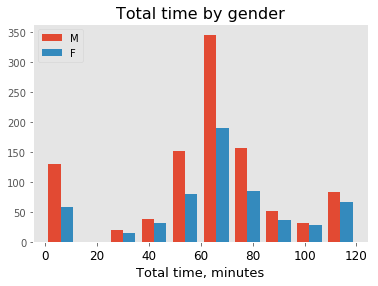

In [9]:
x = df_120['total'][df['athlete_gender'] == 'male']
y = df_120['total'][df['athlete_gender'] == 'female']

# bins = np.linspace(2, 5, 15)
plt.hist([x, y], label=('M','F'))

plt.xlabel('Total time, minutes', fontsize = 13, color = "Black")
# plt.ylabel('Number of finishers', fontsize = 13, color = "Black")
plt.title('Total time by gender', fontsize = 16, color = "Black")
plt.legend(loc=2, fontsize = 10)
# sns.despine(offset=9, trim=True)
plt.grid(False)
plt.tick_params(axis='y', which='both', bottom='off', top='off', labelbottom='off')
plt.xticks(fontsize = 12, color = "Black")

Text(0,0.5,'Total time, seconds')

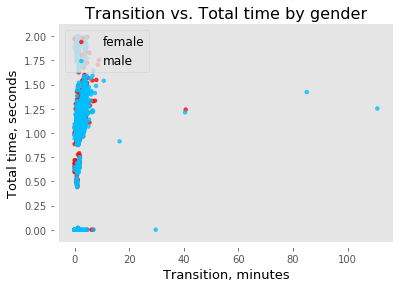

In [10]:
transitionF = df_120['total_tran'][df_120['athlete_gender'] == 'female'] 
transitionM = df_120['total_tran'][df_120['athlete_gender'] == 'male'] 

totalF =  df_120['total_time'][df_120['athlete_gender']  == 'female'] / pd.Timedelta(hours=1)
totalM = df_120['total_time'][df_120['athlete_gender']  == 'male'] / pd.Timedelta(hours=1)

colors = ('red', 'deepskyblue')
groups = ('female', 'male')
datas = (transitionF, transitionM)
totals = (totalF, totalM)

for data, color, total, group in zip(datas, colors, totals, groups):
    plt.scatter(data, total, alpha=0.8, c=color, edgecolors='none', s=20, label=group)
    
plt.title('Transition vs. Total time by gender', fontsize = 16, color = "Black")

sns.despine(offset=5, trim=True);
plt.grid(False)
plt.legend(loc=2, fontsize = 12)
plt.xlabel('Transition, minutes', fontsize = 13, color = "Black")
plt.ylabel('Total time, seconds', fontsize = 13, color = "Black")

In [11]:
df['bike_norm'] = df['bike_m']/df['bike_m'].median()
df['swim_norm'] = df['swim_m']/df['swim_m'].median()
df['run_norm'] = df['run_m']/df['run_m'].median()
df['total_norm'] = df['bike_norm'] + df['swim_norm'] + df['run_norm']
df['total_tran_norm']=df['total_tran']/df['total_tran'].median()

# df['Total_norm_rank'] = df['Total_norm'].rank(ascending=True)

In [12]:
df_120['bike_norm'] =df_120['bike_m']/df_120['bike_m'].median()
df_120['swim_norm'] = df_120['swim_m']/df_120['swim_m'].median()
df_120['run_norm'] = df_120['run_m']/df_120['run_m'].median()
df_120['total_norm'] = df_120['bike_norm'] + df_120['swim_norm'] + df_120['run_norm']
df_120['total_tran_norm']=df_120['total_tran']/df_120['total_tran'].median()

/Users/jenniferarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jenniferarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jenniferarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Text(0,0.5,'Total time, seconds')

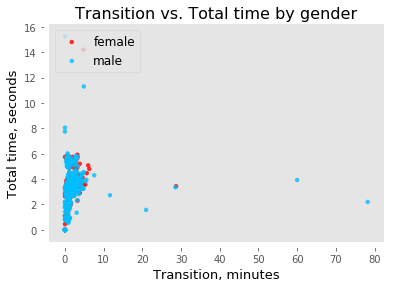

In [13]:
transitionF = df_120['total_tran_norm'][df_120['athlete_gender'] == 'female'] 
transitionM = df_120['total_tran_norm'][df_120['athlete_gender'] == 'male'] 

totalF =  df_120['total_norm'][df_120['athlete_gender']  == 'female'] 
totalM = df_120['total_norm'][df_120['athlete_gender']  == 'male'] 
colors = ('red', 'deepskyblue')
groups = ('female', 'male')
datas = (transitionF, transitionM)
totals = (totalF, totalM)

for data, color, total, group in zip(datas, colors, totals, groups):
    plt.scatter(data, total, alpha=0.8, c=color, edgecolors='none', s=20, label=group)
    
plt.title('Transition vs. Total time by gender', fontsize = 16, color = "Black")

sns.despine(offset=5, trim=True);
plt.grid(False)
plt.legend(loc=2, fontsize = 12)
plt.xlabel('Transition, minutes', fontsize = 13, color = "Black")
plt.ylabel('Total time, seconds', fontsize = 13, color = "Black")

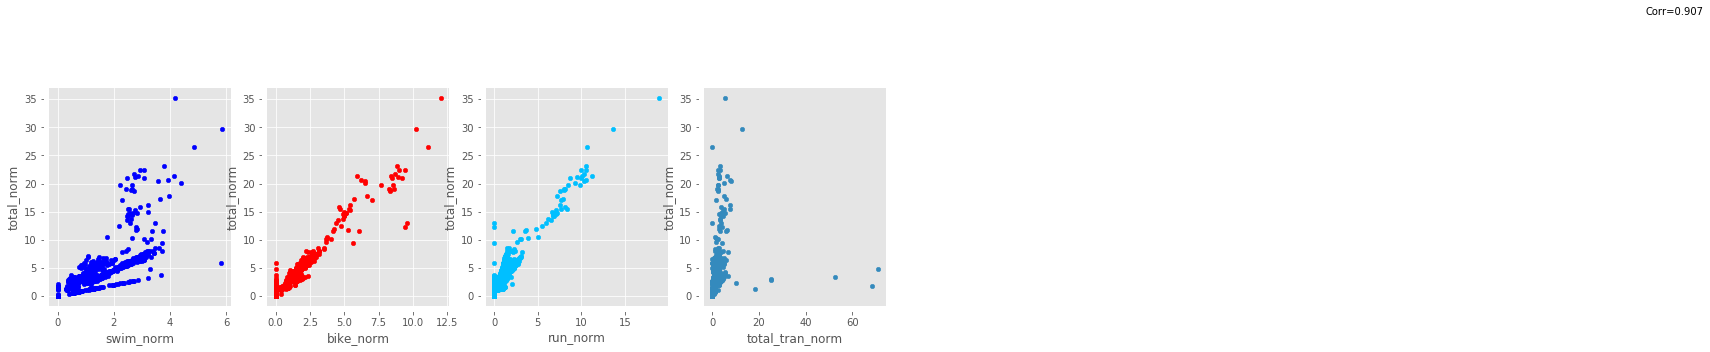

In [14]:
fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=4)

a = np.corrcoef(df['swim_norm'], df['total_norm'])
b = np.corrcoef(df['bike_norm'], df['total_norm'])
c = np.corrcoef(df['run_norm'], df['total_norm'])
d = np.corrcoef(df['total_tran_norm'], df['total_norm'])

df.plot.scatter(x='swim_norm', y='total_norm', ax=axes[0], color = "blue")
plt.grid(False)
# plt.text(-1200,50,"Corr=%0.3f" % a[0,1])


df.plot.scatter(x='bike_norm', y='total_norm', ax=axes[1], color = "red")
# plt.text(-400,50,"Corr=%0.3f" % b[0,1])

df.plot.scatter(x='run_norm', y='total_norm', ax=axes[2], color = "deepskyblue")

df.plot.scatter(x='total_tran_norm', y='total_norm', ax=axes[3])
plt.text(400,50,"Corr=%0.3f" % c[0,1])
plt.grid(False)
sns.despine(offset=5, trim=True)

In [69]:
df_10= df_10.fillna(0)


In [70]:
drop_columns= ['Unnamed: 0','athlete_last','validated']

In [155]:
total = total.fillna(0)

In [156]:
coach=[]
for i in total['coach']:
    if i ==0:
        coach.append(0)
    else:
        coach.append(1)


In [157]:
higher_education=[] 
for i in total['higher_education']:
    if i ==0:
        higher_education.append(0)
    else:
        higher_education.append(1)

In [158]:
hobbies=[]
for i in total['hobbies']:
    if i ==0:
        hobbies.append(0)
    else:
        hobbies.append(1)

In [159]:
injuries=[]
for i in total['injuries']:
    if i ==0:
        injuries.append(0)
    else:
        injuries.append(1)

In [160]:
languages_spoken=[]
for i in total['languages_spoken']:
    if i ==0:
        languages_spoken.append(0)
    else:
        languages_spoken.append(1)

In [161]:
marital_status=[]
for i in total['marital_status']:
    if i ==0:
        marital_status.append(0)
    else:
        marital_status.append(1)

In [162]:
occupation=[]
for i in total['occupation']:
    if i ==0:
        occupation.append(0)
    else:
        occupation.append(1)

In [163]:
sponsors=[]
for i in total['sponsors']:
    if i ==0:
        sponsors.append(0)
    else:
        sponsors.append(1)

In [164]:
spouse_children=[]
for i in total['spouse_children']:
    if i ==0:
        spouse_children.append(0)
    else:
        spouse_children.append(1)

In [181]:
total['coach']=coach                                           
total['higher_education']=higher_education                  
total['hobbies']= hobbies                                
total['injuries']=injuries                           
total['languages_spoken']= languages_spoken                       
total['marital_status']=marital_status                      
total['occupation']=occupation                          
total['sponsors']=sponsors                          
total['spouse_children']=spouse_children


In [186]:
total= total.drop(['level_0','index'], axis =1)

In [27]:
df= df.fillna(0)

In [29]:
# df= df.drop('capitalize_gender', axis=1)

In [435]:
# df_dummies= pd.get_dummies(df['athlete_categoreis','athelte_country_id'])

In [30]:
_language=[]
for  i in df['languages_spoken']:
    if type(i)== str:
        _language.append(1)
    else: 
        _language.append(0)

In [31]:
_hobbies=[]
for  i in df['hobbies']:
    if type(i)== str:
        _hobbies.append(1)
    else: 
        _hobbies.append(0)

In [32]:
df['hobbies']= _hobbies

In [33]:
_sponsors=[]
for  i in df['sponsors']:
    if type(i)== str:
        _sponsors.append(1)
    else: 
        _sponsors.append(0)


In [34]:
df['sponors']=_sponsors

In [35]:
test_education=[]
for  i in df['higher_education']:
    if type(i)== str:
        test_education.append(1)
    else: 
        test_education.append(0)
  

In [36]:
df['higher_education']=test_education

In [37]:
test=[]
for  i in df['coach']:
    if type(i)== str:
        test.append(1)
    else: 
        test.append(0)
  

In [38]:
df['coach']=test 

In [39]:
df['occupation']=df.occupation.replace(['Rif, Salzburg, Austria','Full time triathlete','Full Time Triathlete','Professional triathlete','Triathlete','Professional triathlete','athlete','Athlete','Pro Triathlete','Professional Athlete','Professional Triathlete and operator of the sportsmarket www.moovemee.ch',],['triathlete','triathlete','triathlete','triathlete','triathlete','triathlete','triathlete','triathlete','triathlete','triathlete','triathlete'])
df['occupation']=df.occupation.replace(['Student','Student- Athlete','University student','Triathlete and Student','STUDENT','University of Colorado, Boulder. ',],['student','student','student','student','student','student'])
df['occupation']=df.occupation.str.lower()
df['occupation']=df.occupation.replace(['qualified lawyer','ministry of internal affairs of ukraine, zhytomyr ','lawyer lic. jur'],['lawyer','lawyer','lawyer'])
df['occupation']=df.occupation.replace(['pe teacher','pe teacher, mtb coach','sportsman-instructor'],['coach','coach','coach'])
df['occupation']=df.occupation.replace(['executive assistant at remgro limited.','office worker','forex trader'],['assistant','assistant','assistant'])
df['occupation']=df.occupation.replace(['professional athletes occupied by austrian armed forces','triathlon athlete @ austrian armed forces'],['army','army'])


In [40]:
 df['spouse_children'].unique()

array([0, 'no', 'Luca Sclebin', '2 Daughters', '-',
       '1 boy (Yannis 2013)\n1 girl (Malea 2017)', 'non', 'nothing',
       'None', 'ー'], dtype=object)

In [41]:
df['spouse_children']=df.spouse_children.replace(['no','non','nothing','None','ー','NaN','-','nan'],[0,0,0,0,0,0,0,0])
df['spouse_children']=df.spouse_children.replace(['Luca Sclebin'],['boy'])
df['spouse_children']=df.spouse_children.replace(['2 Daughters'],['2_girls'])
df['spouse_children']=df.spouse_children.replace(['1 boy (Yannis 2013)\n1 girl (Malea 2017)'],['boy_girl'])

In [42]:
# df.injuries = df.injuries.apply(lambda x: 'stress_fractures' if 'stress' in x else x)
df['injuries']=df.injuries.replace(['I have suffered from fasciitis of sole, periostitis and bursitis in knee and shoulder but now I&#8217;m recovered. '],['knee'])
df['injuries']=df.injuries.replace(['Broken collarbone\nITB junior','Broken clavicle','Broken clavicle '],['collarbone','collarbone','collarbone'])
df['injuries']=df.injuries.replace(['Broken leg 2006'],['broken_leg'])
df['injuries']=df.injuries.replace(['2 stress fractures','Stress fractures:\nSept 2007, April 2008, April 2009,May 2010. Achilles September 2010, May-Dec 2011', 'Stress reaction (not a fracture yet) on the    leg, 2004 - Knee injury, 2005 - Inflammation of a rib, 2006 - Stress reaction, 2006 - Knee injury, 2008 - Broken hand, March 2016'],['stress_fracture','stress_fracture','stress_fracture'])
df['injuries']=df.injuries.replace(['Operated my achilles end of 2017. '],['achilles'])
df['injuries']=df.injuries.replace(['- Stress reaction (not a fracture yet) on the    leg, 2004 - Knee injury, 2005 - Inflammation of a rib, 2006 - Stress reaction, 2006 - Knee injury, 2008 - Broken hand, March 2016','Broken RHS Elbow and stress fracture of the lower sacrum'],['stress_fracture','stress_fracture'])
df['injuries']=df.injuries.replace(['no','I am a very lucky athlete with very few injuries.','non','none','None','No'],[0,0,0,0,0,0])


In [216]:
for i in total['current_rankings']: 
    print (len(i))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
79
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
88
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
88
2
2
87
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
346
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


TypeError: object of type 'int' has no len()

In [218]:
class_dict=[]
for item in total['current_rankings']:
    try:
        if len(item)>=4:
            class_dict.append(1)
        else: 
            class_dict.append(0)
    except:
        class_dict.append(0)

1765

In [221]:
total['current_rankings']=class_dict

In [46]:
df['event_id']=df['event_id'].astype('category')

In [47]:
df['event_id'].dtype

CategoricalDtype(categories=[  4849,  45610,  50528,  54596,  71375,  79546,  79712,
                   85967,  91424,  91602,
                  ...
                  124013, 124444, 127897, 128090, 128102, 128128, 129662,
                  129679, 129812, 130820],
                 ordered=False)

In [203]:
total['weight']= total['weight'].str.decode('utf-8') 

In [204]:
total['weight']= total['weight'].replace(' kg',' ')

In [209]:
total.fillna(0)

,total_time,athlete_categories,athlete_country_id,athlete_gender,athlete_id,athlete_yob,coach,current_rankings,higher_education,hobbies,...,event_venue,headers_count,position,prog_id,result_id,swim,t1,bike,t2,run
0,02:30:38,[42],293.0,male,8405.0,1975.0,0,[],0,0,...,"Honolulu, Hawaii",5.0,119,2088.0,26828.0,00:25:38,00:01:29,01:10:46,00:00:57,00:51:50
1,01:42:35,[42],293.0,male,8404.0,1971.0,0,[],1,0,...,Vancouver,5.0,8,4241.0,582309.0,00:09:05,00:00:00,00:55:57,00:00:00,00:37:32
2,01:57:09,[42],293.0,male,8403.0,1975.0,0,[],0,0,...,Budapest,5.0,5,5899.0,253099.0,00:22:31,00:04:52,00:42:20,00:06:58,00:40:29
3,02:16:20,[42],293.0,male,8402.0,1971.0,0,[],1,1,...,"Honolulu, Hawaii",5.0,91,2088.0,26800.0,00:26:43,01:05:09,00:00:00,00:01:09,00:43:21
4,02:00:07,[42],293.0,male,8401.0,1972.0,0,[],0,0,...,"Honolulu, Hawaii",5.0,5,2088.0,26714.0,00:21:54,00:01:17,00:58:46,00:00:50,00:37:22
5,01:41:13,[42],293.0,male,8400.0,1971.0,0,[],0,0,...,Vancouver,5.0,5,4241.0,582306.0,00:09:23,00:00:00,00:55:47,00:00:00,00:36:04
6,02:14:13,"[40, 42]",293.0,male,8399.0,1973.0,0,[],0,0,...,Lausanne,5.0,16,2460.0,659693.0,00:21:47,00:06:05,00:05:16,00:14:58,01:26:08
7,02:24:00,[42],293.0,male,8398.0,1973.0,0,[],0,0,...,"Honolulu, Hawaii",5.0,111,2088.0,26820.0,00:29:07,00:01:57,01:11:54,00:01:02,00:40:02
8,02:06:05,[42],293.0,male,8397.0,1972.0,0,[],0,0,...,"Honolulu, Hawaii",5.0,28,2088.0,26737.0,00:22:53,00:01:16,01:03:09,00:00:48,00:38:00
9,01:45:18,[42],293.0,male,8396.0,1971.0,0,[],0,0,...,Vancouver,5.0,16,4241.0,582317.0,00:09:52,00:00:00,00:57:24,00:00:00,00:38:02


In [810]:
dummies = pd.get_dummies(df[['athlete_categories','athlete_country_id','athlete_gender','injuries']])

In [811]:
frame = [df, dummies]

data= pd.concat(frame, axis=1)

In [812]:
# df= df.drop('athlete_id',axis=1)
# df= df.drop('validated',axis=1)

In [813]:
# data= data.fillna(0)

In [814]:
# data= data.drop(['athlete_categories','athlete_categories'], axis=1)
data= data.drop(['athlete_gender','coach_1','event_categories','event_country','place_of_birth','event_specifications','event_venue'], axis=1)


In [836]:
data.to_csv('data_FINAL')

In [815]:
data['position']= data.position.replace(['DNS','LAP','DNF','DSQ'],[0,0,0,0])

In [816]:
data.columns[85:]
   

Index([], dtype='object')

In [84]:
df_data= pd.read_csv('data_FINAL')

In [99]:
df_10.columns


Index(['athlete_categories', 'athlete_country_id', 'athlete_gender',
       'athlete_id', 'athlete_yob', 'coach', 'current_rankings',
       'higher_education', 'hobbies', 'injuries', 'languages_spoken',
       'marital_status', 'occupation', 'place_of_birth', 'sponsors',
       'spouse_children', 'weight', 'finish_percentage', 'race_finishes',
       'race_podium_percentage', 'race_podiums', 'race_starts', 'race_wins',
       'event_categories', 'event_country', 'event_country_id', 'event_date',
       'event_id', 'event_latitude', 'event_longitude', 'event_region_id',
       'event_specifications', 'event_venue', 'headers_count', 'position',
       'prog_id', 'result_id', 'result_listing', 'team', 'team_id',
       'team_order', 'total_time', 'swim', 't1', 'bike', 't2', 'run',
       'higher_education_1', 'injuries_1', 'occupation_1'],
      dtype='object')

In [231]:
total.to_csv('OFFICAL_TOTAL')

In [238]:
# for i in [['total_time', 'swim', 't1', 'bike', 't2', 'run']]
for i in total['swim']:
    t= i.to_timedelta()

AttributeError: 'str' object has no attribute 'to_timedelta'

In [817]:
from scipy import stats
import numpy as np
import pandas as pd 
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from scipy.stats import pearsonr
import statsmodels.api as sm
import datetime as dt
from datetime import datetime, time, date
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics

In [818]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


In [824]:
#Classifying X and Y values 
X= data[['athlete_country_id', 'athlete_yob', 'coach',
       'current_rankings', 'higher_education', 'hobbies',
       'languages_spoken' , 'weight', 'finish_percentage', 'race_finishes',
       'race_podium_percentage', 'race_podiums', 'race_starts', 'race_wins', 'event_latitude',
       'event_longitude', 'event_region_id', 'headers_count', 'position',
       'prog_id', 'result_id', 'bike_m','swim_m', 'run_m', 't1_s', 't2_s', 'total_tran', 'higher_education_1',
       'hobbies_1', 'injuries_1', 'languages_spoken_1', 'marital_status_1',
       'occupation_1', 'sponsors_1', 'spouse_children_1', 'total_tran_norm', 'athlete_country_id', 'event_country_id', 'event_id',
       'athlete_categories_[39, 42]', 'athlete_categories_[39]',
       'athlete_categories_[40, 42]', 'athlete_categories_[40]',
       'athlete_categories_[42]', 'athlete_gender_female',
       'athlete_gender_male', 'injuries_0', 'injuries_achilles',
       'injuries_broken_leg', 'injuries_collarbone', 'injuries_face_scar',
       'injuries_knee', 'injuries_stress_fracture']]
y=data['total']

#train, test split 
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)

# Random Forest

In [825]:
forest = DecisionTreeRegressor()
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.926


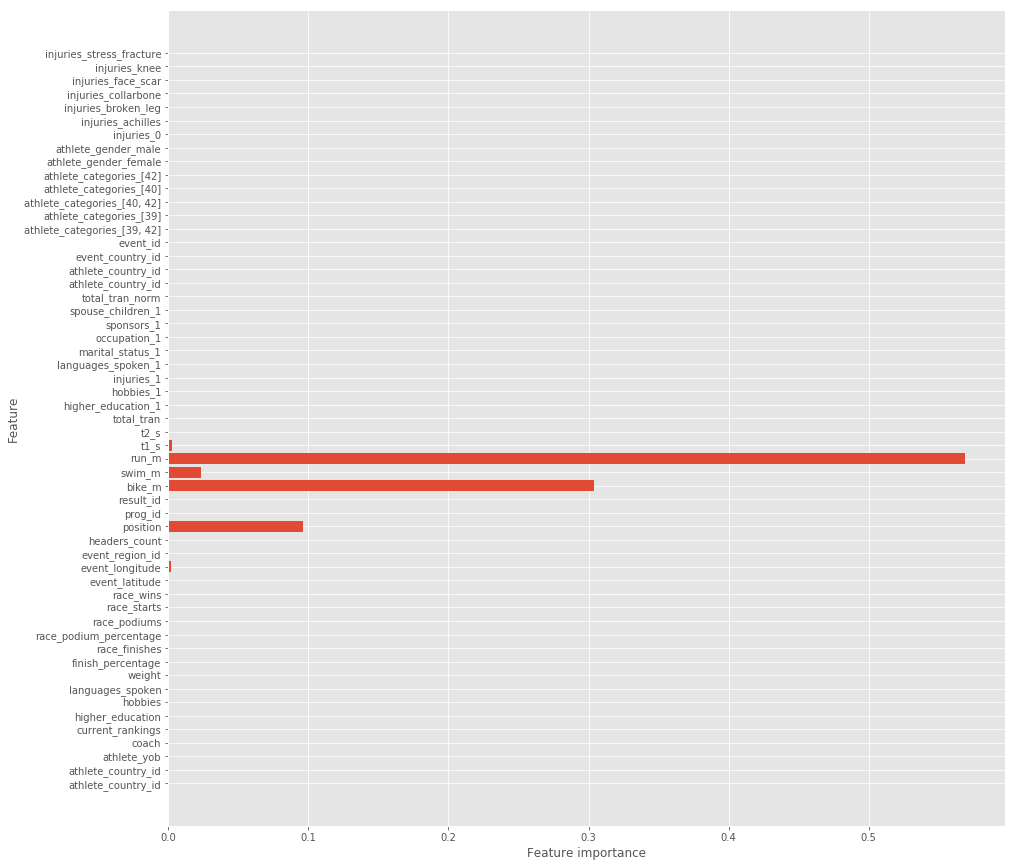

In [826]:
plot_feature_importances(forest)

# Gradient Boosting 

In [827]:

gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)
y_predict_gb= gbrt.predict(X_test)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.987


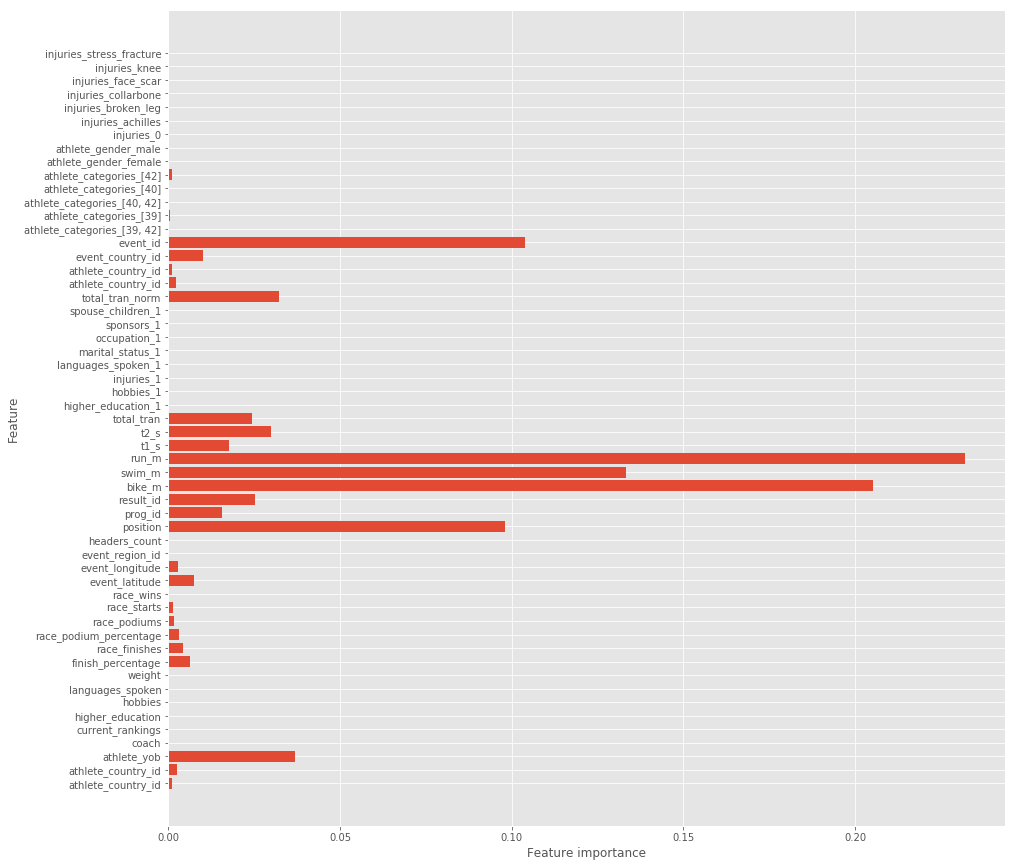

In [828]:
plot_feature_importances(gbrt)

# with no bike, run or swim  

# Random Forest

In [829]:
def plot_feature_importances_1(model):
    n_features = X_train_1.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_1.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [830]:
#Classifying X and Y values 
X_1= data[[ 'athlete_yob', 'coach',
       'current_rankings', 'higher_education', 'hobbies',
       'languages_spoken' , 'weight', 'finish_percentage', 'race_finishes',
       'race_podium_percentage', 'race_podiums', 'race_starts', 'race_wins', 'event_latitude',
       'event_longitude', 'event_region_id', 'headers_count', 'position','t1_s', 't2_s', 'total_tran', 'higher_education_1',
       'hobbies_1', 'injuries_1', 'languages_spoken_1', 'marital_status_1',
       'occupation_1', 'sponsors_1', 'spouse_children_1', 'total_tran_norm', 'athlete_categories_[39, 42]', 'event_country_id',
       'athlete_categories_[39, 42]', 'athlete_categories_[39]',
       'athlete_categories_[40, 42]', 'athlete_categories_[40]',
       'athlete_categories_[42]', 'athlete_gender_female',
       'athlete_gender_male', 'injuries_0', 'injuries_achilles',
       'injuries_broken_leg', 'injuries_collarbone', 'injuries_face_scar',
       'injuries_knee', 'injuries_stress_fracture']]
y_1=data['total']

#train, test split 
X_train_1, X_test_1, y_train_1, y_test_1= train_test_split(X_1, y_1, random_state=0)

In [831]:
forest_1 = DecisionTreeRegressor()
forest_1.fit(X_train_1, y_train_1)
print("Accuracy on training set: {:.3f}".format(forest_1.score(X_train_1, y_train_1)))
print("Accuracy on test set: {:.3f}".format(forest_1.score(X_test_1, y_test_1)))

Accuracy on training set: 1.000
Accuracy on test set: 0.158


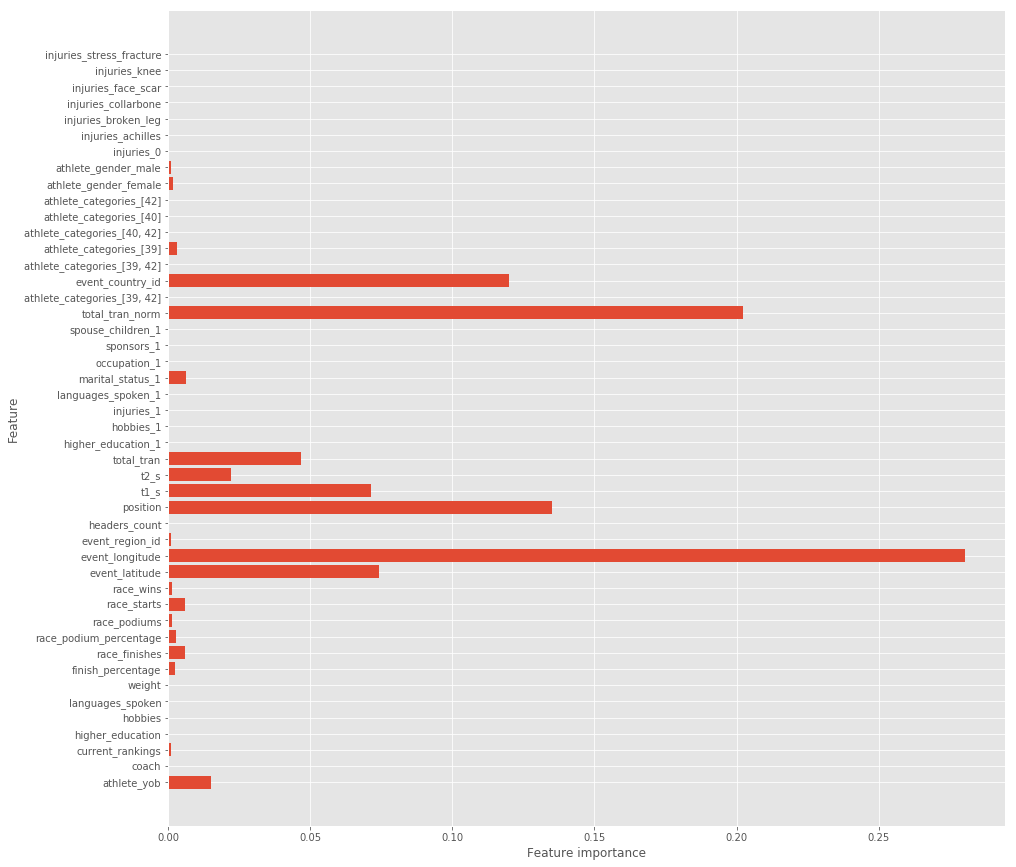

In [832]:
plot_feature_importances_1(forest_1)

# Gradient Boosting 

In [833]:

gbrt_1 = GradientBoostingRegressor(random_state=0)
gbrt_1.fit(X_train_1, y_train_1)
y_predict_gb= gbrt_1.predict(X_test_1)

print("Accuracy on training set: {:.3f}".format(gbrt_1.score(X_train_1, y_train_1)))
print("Accuracy on test set: {:.3f}".format(gbrt_1.score(X_test_1, y_test_1)))

Accuracy on training set: 0.870
Accuracy on test set: 0.624


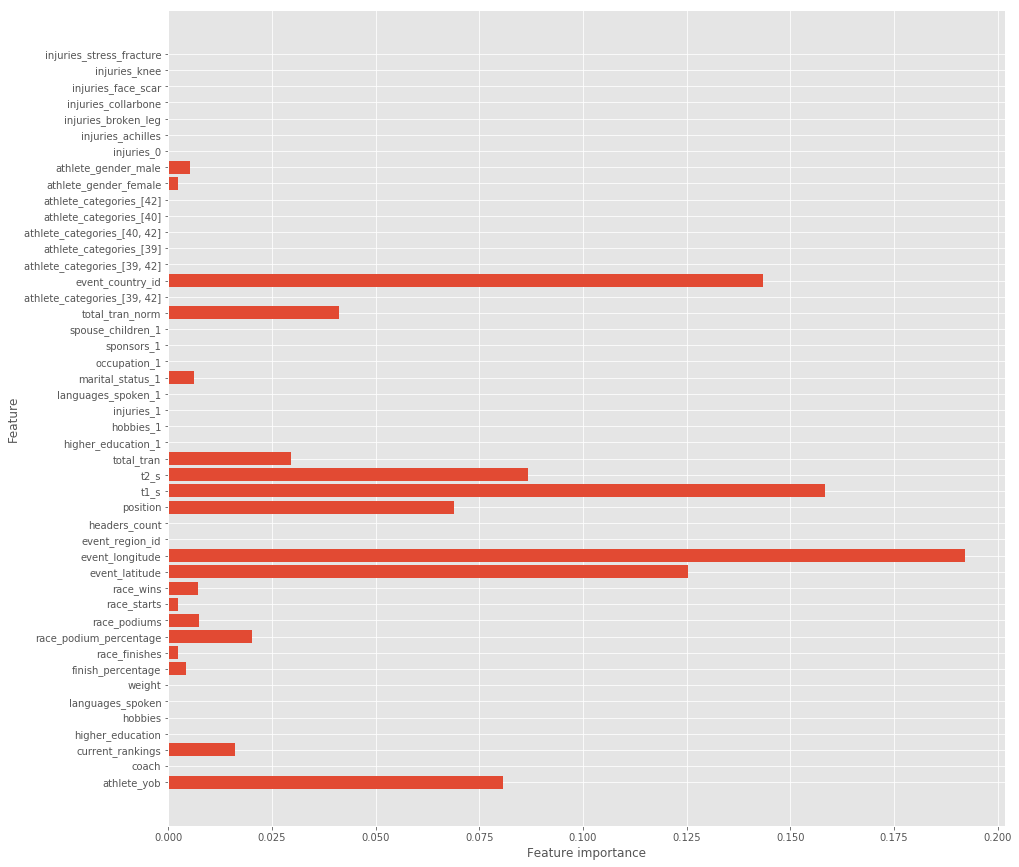

In [834]:
plot_feature_importances_1(gbrt_1)

In [837]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
y_model = model.predict(X)

In [838]:
print("Test set predictions: {}".format(model.predict(X_test)))
print("Test set accuracy: {:.2f}".format(model.score(X_test, y_test)))

Test set predictions: [ 64.80555556  64.87222222  39.72777778 150.10555556  64.38333333
  63.64444444  57.14444444 121.5         77.12777778  39.88333333
  69.72222222  66.31111111 134.13333333  61.60555556 171.18333333
  70.05        21.76111111  44.18333333  84.81666667 113.55555556
  82.          59.34444444  78.19444444 104.67222222  39.82222222
  64.08333333 143.95555556  65.86666667  39.67222222 148.48888889
  64.12222222  40.45       148.48888889  27.09444444  61.37222222
  53.8         69.37222222 145.8         71.07777778  74.88888889
  82.58888889  67.23333333 110.91666667  50.84444444  68.00555556
  88.43333333  60.54444444  55.15       110.54444444 161.47222222
  50.85555556  60.37777778  19.91666667  78.1         78.19444444
  86.66666667 157.95       106.82222222  65.22777778 354.59444444
 147.28888889  78.13888889  91.84444444  78.70555556  54.58333333
  78.78333333 120.23333333  36.8        144.55        67.35555556
  64.30555556  82.12777778  39.65555556 155.88333333 1

In [840]:
model_1 = KNeighborsRegressor(n_neighbors=3)
model_1.fit(X_train_1, y_train_1)
y_model_1 = model_1.predict(X_1)

In [842]:
print("Test set predictions: {}".format(model_1.predict(X_test_1)))
print("Test set accuracy: {:.2f}".format(model_1.score(X_test_1, y_test_1)))

Test set predictions: [ 47.12222222 129.55        43.98888889  97.57777778 128.35555556
  97.46666667  93.31666667  90.7         61.58333333  40.66111111
 117.75        92.44444444  69.93888889  78.77222222 116.05
  94.33888889  80.49444444  87.64444444  82.05        87.73333333
 102.48888889  60.33333333  87.73888889  74.7         99.6
  94.69444444 133.75        82.83888889  23.47777778  94.32222222
  63.73333333  35.90555556 104.63333333 114.65        86.01666667
  19.79444444  57.08333333  92.37222222   0.           0.
  38.06111111 118.48333333  90.90555556 115.86666667  97.07777778
 140.74444444  78.20555556  61.95       263.57222222  48.43333333
  74.44444444  61.88888889   0.          98.51666667  73.36111111
 108.54444444 131.41111111  78.63333333  84.82777778 171.11666667
 107.4         74.84444444  76.95555556 101.95555556  58.21666667
  61.61111111 120.23333333  55.06666667 118.76666667  61.07222222
  56.97222222  71.92222222  53.98333333 100.96111111 105.52777778
  85.8666

NameError: name 'X' is not defined